Olman Alexander Silva 2343025

Desarrollo guias del proyecto FDAYCN 1, 2 y 3.

2. Neural networks with PyTorch

In [1]:
# Import things like usual

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt
from torchvision import datasets, transforms

Get our dataset

In [5]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                             ])
# Download and load the training data
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [6]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

Show the images

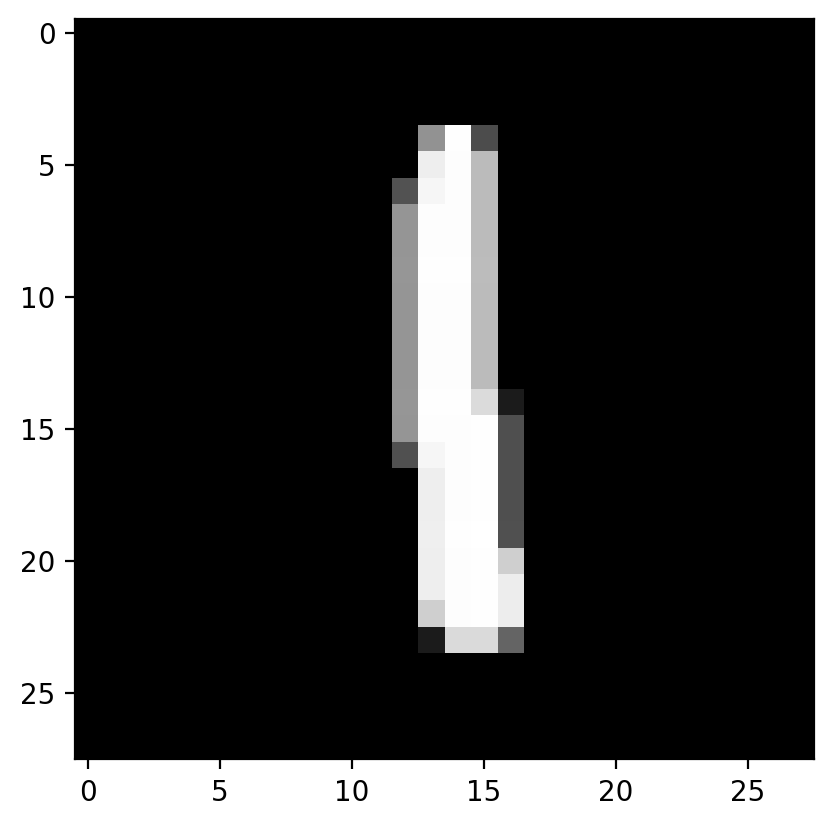

In [7]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

Building networks with PyTorch

Here I'll use PyTorch to build a simple feedfoward network to classify the MNIST images. That is, the network will receive a digit image as input and predict the digit in the image.

In [8]:
from torch import nn
from torch import optim
import torch.nn.functional as F

In [9]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Defining the layers, 128, 64, 10 units each
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        # Output layer, 10 units - one for each digit
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''

        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)

        return x

model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

Initializing weights and biases

In [10]:
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[-0.0349, -0.0353,  0.0130,  ...,  0.0281, -0.0050, -0.0256],
        [ 0.0037, -0.0054, -0.0076,  ..., -0.0355,  0.0091,  0.0341],
        [-0.0354, -0.0225,  0.0228,  ..., -0.0095,  0.0349,  0.0077],
        ...,
        [ 0.0325, -0.0106, -0.0263,  ...,  0.0294,  0.0156,  0.0251],
        [ 0.0277,  0.0121, -0.0337,  ..., -0.0322, -0.0165,  0.0200],
        [ 0.0057,  0.0247,  0.0036,  ..., -0.0333, -0.0241,  0.0265]],
       requires_grad=True)
Parameter containing:
tensor([-1.7871e-02,  3.3503e-02, -2.1528e-03,  9.8257e-03,  1.4597e-02,
        -1.9084e-02,  1.6243e-02,  3.0689e-02, -3.5194e-02, -2.9086e-02,
         1.8223e-02, -2.4633e-02,  3.3038e-03, -2.7968e-02, -1.2594e-03,
         6.0976e-04, -2.1236e-03, -1.2463e-02,  1.9370e-02, -3.4008e-03,
        -3.0466e-03,  7.1593e-03, -5.9242e-03,  9.8663e-03,  2.1720e-02,
        -2.6699e-02, -4.6849e-03,  2.2720e-02,  7.4133e-03, -1.4830e-02,
        -9.2200e-03, -3.1709e-02,  8.5259e-03,  1.6523e-0

For custom initialization

In [11]:
# Set biases to all zeros
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
# sample from random normal with standard dev = 0.01
model.fc1.weight.data.normal_(std=0.01)

tensor([[-0.0120, -0.0033,  0.0091,  ..., -0.0012, -0.0088, -0.0013],
        [ 0.0229, -0.0075,  0.0120,  ...,  0.0156,  0.0029,  0.0060],
        [-0.0136, -0.0018,  0.0047,  ..., -0.0036,  0.0127, -0.0039],
        ...,
        [-0.0053,  0.0090,  0.0022,  ..., -0.0107,  0.0017,  0.0151],
        [-0.0045, -0.0047, -0.0028,  ..., -0.0113, -0.0001, -0.0123],
        [-0.0164,  0.0022, -0.0025,  ..., -0.0063,  0.0101, -0.0188]])

Forward pass

Now that we have a network, let's see what happens when we pass in an image. This is called the forward pass. We're going to convert the image data into a tensor, then pass it through the operations defined by the network architecture.

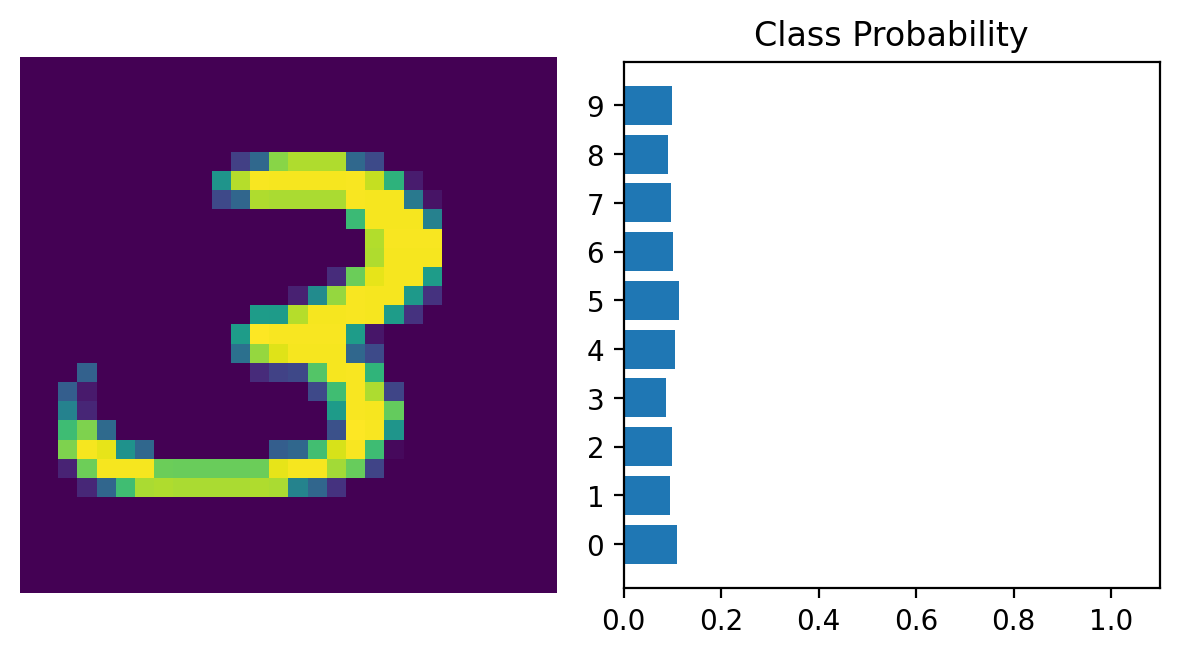

In [19]:
# Grab some data
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels)
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to not automatically get batch size

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]
view_classify(img.view(1, 28, 28), ps)

In [17]:
import matplotlib.pyplot as plt
import numpy as np

def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()
    plt.show()

As you can see above, our network has basically no idea what this digit is. It's because we haven't trained it yet, all the weights are random!

PyTorch provides a convenient way to build networks like this where a tensor is passed sequentially through operations, nn.Sequential (documentation). Using this to build the equivalent network:

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


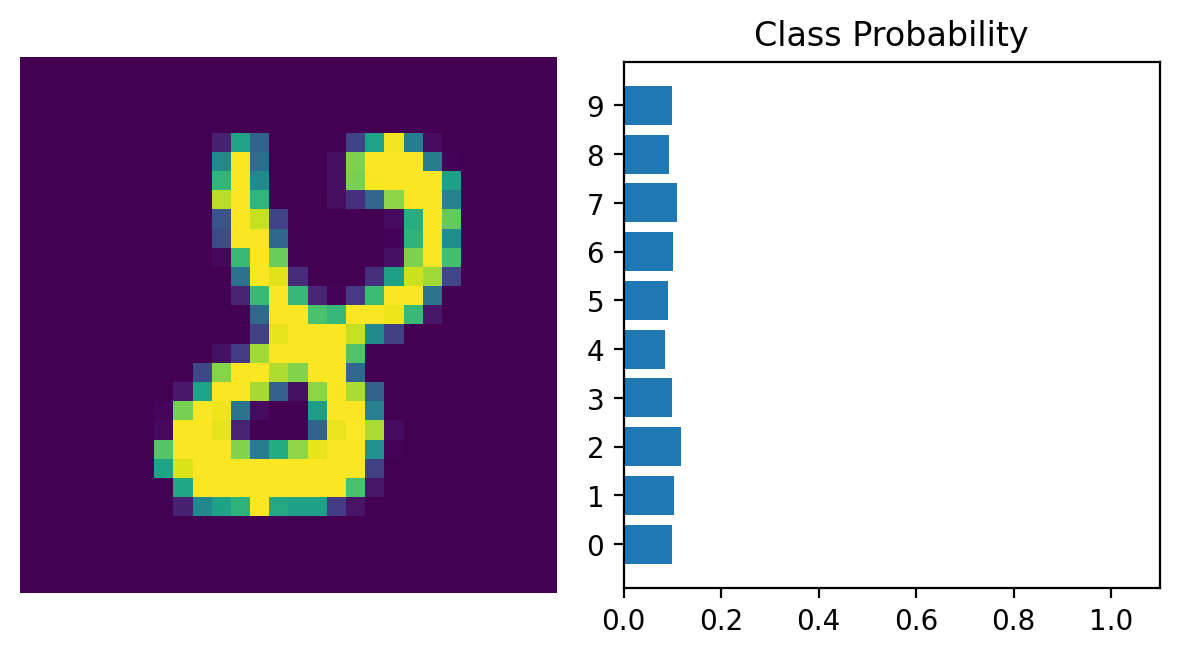

In [22]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
view_classify(images[0].view(1, 28, 28), ps)

You can also pass in an OrderedDict to name the individual layers and operations. Note that a dictionary keys must be unique, so each operation must have a different name.

In [23]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

Exercise

Build a network to classify the MNIST images with three hidden layers. Use 400 units in the first hidden layer, 200 units in the second layer, and 100 units in the third layer. Each hidden layer should have a ReLU activation function, and use softmax on the output layer.

Sequential(
  (0): Linear(in_features=784, out_features=400, bias=True)
  (1): ReLU()
  (2): Linear(in_features=400, out_features=200, bias=True)
  (3): ReLU()
  (4): Linear(in_features=200, out_features=100, bias=True)
  (5): ReLU()
  (6): Linear(in_features=100, out_features=10, bias=True)
  (7): Softmax(dim=1)
)


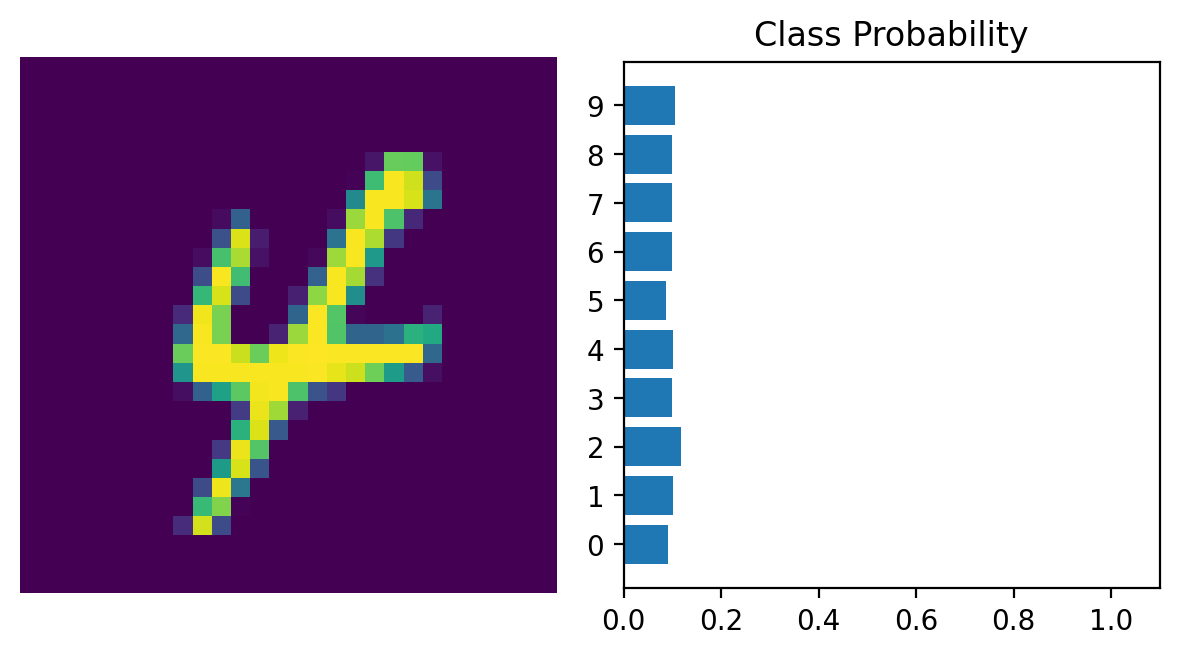

In [24]:
# Define the network architecture
model = nn.Sequential(nn.Linear(784, 400),
                      nn.ReLU(),
                      nn.Linear(400, 200),
                      nn.ReLU(),
                      nn.Linear(200, 100),
                      nn.ReLU(),
                      nn.Linear(100, 10),
                      nn.Softmax(dim=1))

# Print the model architecture to verify
print(model)

# Perform a forward pass with a sample image to test
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
view_classify(images[0].view(1, 28, 28), ps)